### Feature extraction

In [1]:
import os

def get_paths(directory, last_element=False):
    '''
    Devuelve la ruta relativa de las muestras .bmp
    '''
    paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".bmp"):
                if last_element:
                    paths.append(str(file))
                else:
                    paths.append(os.path.join(root, file))
    return paths

In [12]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16 as vgg16_preprocessor
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
import cv2

model = VGG16(weights='imagenet')
# model = Model(model.input, model.layers[-2].output)
# model.summary()

img_paths = get_paths("Polar Outputs")
resized = [cv2.resize(cv2.imread(muestra),(224,224))  for muestra in img_paths] # en blanco y negro
features = []

# for path in img_paths[:2]:
#     print(path)
#     img = image.load_img(path, target_size=(224, 224))
for img in resized[:2]:
    print(path)
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model.predict(img_data)
    print(vgg16_feature.shape)
    features.append(vgg16_feature)
print("DONE!")

Polar Outputs\001_1_2.bmp
(1, 1000)
Polar Outputs\001_1_2.bmp
(1, 1000)
DONE!


In [9]:
features[0][0].shape

(7, 7, 512)

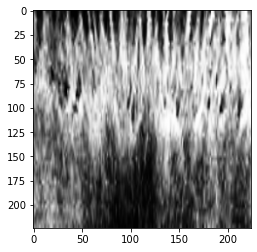

In [8]:
import matplotlib.pyplot as plt
plt.imshow(resized[0]);

In [29]:
features[0][0].shape

(7, 7, 512)